<a href="https://colab.research.google.com/github/ashikshafi08/Learning_Tensorflow/blob/main/TensorFlow_Basics_from_docs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
from tensorflow.keras import layers 

Will be coding through every tutorials and gudies from the TensorFlow Documentation. The goal is to cement the basics for the upcoming developer exam and also knowing the basics very well might help in customizing tensorflow further. 


# TensorFlow Basics 
Things I will be going through: 
- Tensor 
- Variable 
- Automatic Differentiation 
- Intro to graphs and function
- Intro to modules, layers and models 
- Training loop 
- Advanced auto diff
- Ragged tensors 
- Sparse tensors 
- Numpy api 
- Tensor Slicing



## Introduction to Tensors 

In [2]:
# Creating a scalr or called an rank-0 tensors 
rank_0_tensors = tf.constant(4)
rank_0_tensors.ndim

0

In [3]:
# Creating a rank-1 tensors or otherwise called an vector 
rank_1_tensor = tf.constant([1,2,3,4])
rank_1_tensor.ndim , rank_1_tensor

(1,
 <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>)

In [4]:
# Lets create a matrrix otherwise called as a rank 2 tensor 
rank_2_tensor = tf.constant([[1,2,3] , 
                             [4,5,6]])

rank_2_tensor.shape , rank_2_tensor.ndim

(TensorShape([2, 3]), 2)

In [5]:
# Whats the default dtype of the tensors? 
rank_2_tensor.dtype , rank_2_tensor

(tf.int32, <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>)

In [6]:
# Setting the dtype while creating the tensor at first place. 
dtype_tensor = tf.constant([[1 , 2 ,3], 
                            [4, 5, 6]] , dtype = tf.float32)

dtype_tensor.dtype , dtype_tensor

(tf.float32, <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[1., 2., 3.],
        [4., 5., 6.]], dtype=float32)>)

Also tensors can be of more than 3 dimension, also dimensions or axes the same shit. 

In [7]:
# Constructing a rank 3 tensor 
rank_3_tensor = tf.constant([
      [[0 , 1, 2, 3, 4 ] , 
       [5, 6, 7, 8 , 9]] , 

       [[10 , 11, 12, 13, 14] , 
        [15, 16 , 17 , 18 , 19]], 

        [[20 , 21 ,22 ,23 ,24], 
         [25, 26 , 27 , 28 ,29]] ])

print(rank_3_tensor) , rank_3_tensor.ndim 


tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


(None, 3)

In [8]:
# Getting the shape of above matrix 
rank_3_tensor.shape

TensorShape([3, 2, 5])

`TensorShape([3, 2, 5])` it can be decoded into: 
- 3 set of rows 
- 2 rows in each (in one row) 
- 5 elements in each 

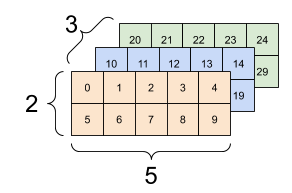

In [9]:
# Converting the tensors inot numpy array 
import numpy as np 

# First way by wrapping in np.array()
print(f'Using np.array method {np.array(rank_3_tensor)}\n')


# We can explicitly use tensor.numpy() to get the numpy version of it.
print(f'Using .numpy method {rank_3_tensor.numpy()}')

Using np.array method [[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]]

Using .numpy method [[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]]


Tensors not only comes with float, ints but also other types including: 
- complex numbers (i,j) 
- strings


The base `tf.Tensor` class requirs the tensors to be 'rectangular' --> that is, along each axis, every elemnt is the same size. 

But with the below tensors class we can handle different shapes, 
- Ragged tensors 
- Sparse tensors 


We can't do operations across tensors with different shapes. 



In [10]:
# Tensors in other kinds of operations than simple arithmetic 

c = tf.constant([
  [4.0 ,5.0] , [10.0 , 1.0] ])


# Find the largest value 
print(tf.reduce_max(c))

# Find the index of the largest value 
print(tf.argmax(c))

# Compute the softmax 
print(tf.nn.softmax(c))

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor(
[[2.6894143e-01 7.3105854e-01]
 [9.9987662e-01 1.2339458e-04]], shape=(2, 2), dtype=float32)


### About shapes 

This is very crucial when we are dealing with tensors. In machine learning most of the error arises due to shape mismatch. Knowing your input and output shapes is vital. 

Lets look into some tensor vocabulary: 

- **Shape** --> The length (number of elemnts) of each of the axes of a tensor. 
- **Rank** --> Number of tensor axes. A scalar has a rank 0, a vector has rank 1 and matrix is rank 2. 
- **Axis** or **Dimensions**: A particular dimension of a tensor. 
- **Size** : The total number of items in the tensor, the product shape vector. 


Lets create a huge shaped tensor and access every parts of it. 

In [11]:
# Creating rank 4 tensor 
rank_4_tensor = tf.zeros(shape = [3,2,4,5])
rank_4_tensor , rank_4_tensor.shape

(<tf.Tensor: shape=(3, 2, 4, 5), dtype=float32, numpy=
 array([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]],
 
 
        [[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]],
 
 
        [[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]], dtype=float32)>, TensorShape([3, 2, 4, 5]))

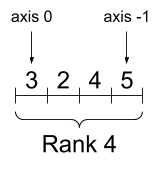

In [12]:
# Printing out the every details of our tensor 

print(f'Type of every element in the tensor: {rank_4_tensor.dtype}\n')
print(f'Number of axes: {rank_4_tensor.ndim}\n')
print(f'Shape of a tensor: {rank_4_tensor.shape}\n')
print(f'Element along axis 0 of a tensor: {rank_4_tensor.shape[0]}\n')
print(f'Element along the last axis of tensor: {rank_4_tensor.shape[-1]}\n')
print(f'Total number of elements (3*2*4*5): {tf.size(rank_4_tensor).numpy()}')

Type of every element in the tensor: <dtype: 'float32'>

Number of axes: 4

Shape of a tensor: (3, 2, 4, 5)

Element along axis 0 of a tensor: 3

Element along the last axis of tensor: 5

Total number of elements (3*2*4*5): 120


Often the axes will be of following order from global to local: 
- Batch axis (None for the most of the time) 
- Spatial dimensions [height, width] for image (224 , 224). 
- Features, the number of outputs. 

### Indexing 

#### **Single-axis Indexing**
TensorFlow follows the standard Python indexing rules, 
- Index starts at 0. 
- Negative indices count backwards from the end. 
- colons (:) are used for slices. `start:stop:step`

In [13]:
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())

[ 0  1  1  2  3  5  8 13 21 34]


In [14]:
rank_1_tensor[0].numpy() , rank_1_tensor[-1].numpy() , rank_1_tensor[1].numpy()

(0, 34, 1)

In [15]:
# Indexing with a slice operator : 

print(f'Getting everything: {rank_1_tensor[:].numpy()}')
print(f'Before 4th indices: {rank_1_tensor[:4].numpy()}')
print(f'From 4 to the end: {rank_1_tensor[4:].numpy()}')
print(f'From 2, before 7: {rank_1_tensor[2:7].numpy()}')
print(f'Every other item: {rank_1_tensor[::2].numpy()}') # start stop step(2)
print(f'Reversed tensor: {rank_1_tensor[::-1].numpy()}')

Getting everything: [ 0  1  1  2  3  5  8 13 21 34]
Before 4th indices: [0 1 1 2]
From 4 to the end: [ 3  5  8 13 21 34]
From 2, before 7: [1 2 3 5 8]
Every other item: [ 0  1  3  8 21]
Reversed tensor: [34 21 13  8  5  3  2  1  1  0]


#### **Multi-axis indexing** 

High rank tensors (3+) are indexed by passing multiple indices. 


In [16]:
print(rank_2_tensor.numpy())

[[1 2 3]
 [4 5 6]]


In [17]:
# Passing an integer for each index, the result is a scalar (one value)

rank_2_tensor[1 , 1].numpy()

5

Indexing using many combinations of integers and slices..

In [18]:
# Get row and column of tensors 

print(f'Second row: {rank_2_tensor[1 , :].numpy()}')
print(f'Second column: {rank_2_tensor[: , 1].numpy()}')
print(f'Last row : {rank_2_tensor[-1 , :].numpy()}')
print(f'First item in last column: {rank_2_tensor[0 , -1].numpy()}\n')
print(f'Skip the first row: {rank_2_tensor[1: , :].numpy()}')

Second row: [4 5 6]
Second column: [2 5]
Last row : [4 5 6]
First item in last column: 3

Skip the first row: [[4 5 6]]


In [19]:
rank_3_tensor , rank_3_tensor.shape

(<tf.Tensor: shape=(3, 2, 5), dtype=int32, numpy=
 array([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9]],
 
        [[10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]],
 
        [[20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29]]], dtype=int32)>, TensorShape([3, 2, 5]))

Selecting the last feature across all locations in example in the batch. 

https://tensorflow.org/guide/tensor_slicing

In [20]:
# For the 3 axis tensor 
rank_3_tensor[: , : , -1] # here we get both the rows and cols, at the end indexing into the 4th index

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 4,  9],
       [14, 19],
       [24, 29]], dtype=int32)>

### Manipulating Shapes 

When we call shape, it returns a `TensorShape` object that shows the size along each axis. 

In [21]:
rank_2_tensor.shape

TensorShape([2, 3])

In [22]:
# Getting the Tensorshape as a python list 
rank_3_tensor.shape.as_list()

[3, 2, 5]

Like wise we can reshape a tensor into a new shape, by calling `tf.reshape` where the underlying data wont be duplicated. 

In [23]:
# Shape takes a list as an argument 
print(f'Actual shape: {rank_1_tensor.shape}')
reshaped_tensor = tf.reshape(rank_1_tensor , shape = [1, 10] ) # adding an extra dim
print(f'\nAfter reshaping: {reshaped_tensor}')

Actual shape: (10,)

After reshaping: [[ 0  1  1  2  3  5  8 13 21 34]]


In [24]:
rank_2_tensor.shape

TensorShape([2, 3])

In [25]:
tf.reshape(rank_2_tensor , shape = [1, 3, 2]) # possibilities are [2,3,1] , [1 ,2 ,3] 

<tf.Tensor: shape=(1, 3, 2), dtype=int32, numpy=
array([[[1, 2],
        [3, 4],
        [5, 6]]], dtype=int32)>

In [26]:
tf.size(rank_2_tensor).numpy()

6

The important to remember is we can play with shapes till it is inbound to the actual values, in our case it is `6`. 

And if we try to exceed the size for instance adding an extra dim that will collapse the entire actual tensor. As long it is equal to 30, things will be fine. 

In [27]:
# Tryna exceed the size 6 
# tf.reshape(rank_2_tensor , shape = [2 , 2 , 2])


# Uncomment to re-produce the error 

Perfect! Like I said before, the tensor values exceeded above 6 and we got the error. 

```
InvalidArgumentError: Input to reshape is a tensor with 6 values, but the requested shape has 8 [Op:Reshape]
```

The data maintains its layout in memory and a new tensor is created, with the requested shape, pointing to the same data. TensorFlow uses C-style "row-major" memory ordering, where incrementing the rightmost index corresponds to a single step in memory.


Also if we are not sure about the reshaping size, then we can use the [-1] which will reshape the actual tensor to whatever it fits. 

Basically it will flatten out the tensor

In [28]:
# Using -1 (Basically it will flatten out the tensor)
tf.reshape(rank_3_tensor , shape = [-1])

<tf.Tensor: shape=(30,), dtype=int32, numpy=
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int32)>

In [29]:
# Mixing the inner shapes to reproduce a new one 
print(tf.reshape(rank_3_tensor , [3*2 , 5]))

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32)


Reshaping will work for any new shape with the same total number of elements, but it will not do anything useful if you dont respect the order of the axes. 

In [30]:
# Below are the bad examples 

# Can't reorder axes with reshape 
print(tf.reshape(rank_3_tensor , shape = [2 , 3 ,5])) # Not a good practice 

# This is a mess lol 
print(tf.reshape(rank_3_tensor , shape = [5, 6]))


# This doesnt work as we exceeded the amount of values in a tensor 
try: 
  tf.reshape(rank_3_tensor , shape = [7 , -1])
except Exception as e:
  print(f'{type(e).__name__}: {e}')

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]], shape=(2, 3, 5), dtype=int32)
tf.Tensor(
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]], shape=(5, 6), dtype=int32)
InvalidArgumentError: Input to reshape is a tensor with 30 values, but the requested shape requires a multiple of 7 [Op:Reshape]


### Broadcasting 

Under certain conditions, smaller tensors are stretched automatically to fit larger tensors when running combined operations on them. 

This will come in handy when **we attempt to multiply or add a tensor to a scalar**. 

In that case, the scalar is broadcast to be the same shape as the other argument. 

In [31]:
x = tf.constant([[ 1, 2, 3]])
y = tf.constant(2)
z = tf.constant([2,2,2])

# Broadcasting on the fly 
print(tf.multiply(x ,2))
print(x * y)

tf.Tensor([[2 4 6]], shape=(1, 3), dtype=int32)
tf.Tensor([[2 4 6]], shape=(1, 3), dtype=int32)


Likewise, axes with the length 1 (ndim) can be stretched out to match the other arguments. Both arguments can be stretched into the same computation. 

In that case a 3x1 matrix is element-wise multiplied by a **1x4 matrix to produce a 3x4 matrix**. 

`3x1 | 1x4` we get 3x4

In [32]:
x = tf.reshape(x , [3,1]) 
print(x.shape)
y = tf.range(1,5)

print(tf.multiply(x , y))

(3, 1)
tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


In [33]:
# Doing the same operation without broadcasting 
x_stretch = tf.constant([[1, 1, 1, 1],
                         [2, 2, 2, 2],
                         [3, 3, 3, 3]])

y_stretch = tf.constant([[1, 2, 3, 4],
                         [1, 2, 3, 4],
                         [1, 2, 3, 4]])

print(x_stretch * y_stretch)  # Again, operator overloading

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


In [34]:
print(tf.broadcast_to(x , y))

tf.Tensor(
[[[[1 1 1 1]
   [2 2 2 2]
   [3 3 3 3]]

  [[1 1 1 1]
   [2 2 2 2]
   [3 3 3 3]]]], shape=(1, 2, 3, 4), dtype=int32)


[To know more about broadcasting](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html)

### `tf.convert_to_tensor()`

We use the `convert_to_tensor` on non-tensor arguments. There is registery of conversions, and most object classes like Numpys `ndarray`, `TensorShape`, Python lists and `tf.Variable` will all convert automatically. 

Also we can use `tf.register_tensor_conversion_function` if we have our own type of dtype to convert into a tensor. 

### Ragged Tensors 

A tensor with variable numbers of elements along some axis is called **ragged**. In that case `tf.ragged.RaggedTensor` for ragged data. 


Below isnt a ragged tensor, 
`[4 , None]`

In [35]:
ragged_list = [
  [0 ,1 , 2 ,3], 
  [4,5] ,
  [6,7,8], 
  [9]
]

In [36]:
try:
  tensor = tf.constant(ragged_list)
except Exception as e:
  print(f'{type(e).__name__}: {e}')

ValueError: Can't convert non-rectangular Python sequence to Tensor.


In [37]:
# Creating a ragged tensor using the tf.ragged 

ragged_tensor = tf.ragged.constant(ragged_list)
ragged_tensor.shape , ragged_tensor

(TensorShape([4, None]),
 <tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>)

Also we can see after finding the first element shape, the rest seems like None. Well this is because, these are the axes with unknown lengths. 

### String Tensors  


`tf.string` is a dtype, which is to say we can represent data as strings in tensors. 

The strings are atomic and cant be indexed the way Python strings are. But by using `tf.string` we can manipulate them. 

In [38]:
# Tensor string 
scalar_string_tensor = tf.constant('Gray wolf')
print(scalar_string_tensor)

tf.Tensor(b'Gray wolf', shape=(), dtype=string)


In [39]:
# Creating a vector of strings 
tensor_of_strings = tf.constant([
            'Gray wolf', 
            'Lazy dogg', 
            'Dumb cats' ])

tensor_of_strings

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'Gray wolf', b'Lazy dogg', b'Dumb cats'], dtype=object)>

The **b** prefix indicates that `tf.string` dtype is not a unicode string, but a byte-string.

To know more about Unicode text https://www.tensorflow.org/tutorials/load_data/unicode

In [40]:
# Basic function : Split 
tf.strings.split(scalar_string_tensor , sep= ' ')

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'Gray', b'wolf'], dtype=object)>

In [41]:
# Splitting a ununiform strings, then they will turn into a RaggedTensor 

tf.strings.split(tensor_of_strings)

<tf.RaggedTensor [[b'Gray', b'wolf'], [b'Lazy', b'dogg'], [b'Dumb', b'cats']]>

In [42]:
# We can also convert "strings of number" into number 
text = tf.constant('1 10 100')
tf.strings.to_number(tf.strings.split(text , ' '))


<tf.Tensor: shape=(3,), dtype=float32, numpy=array([  1.,  10., 100.], dtype=float32)>

In [43]:
# Or we can split it up as unicode and then decode it 
unicode_bytes = tf.constant('アヒル 🦆')

# Splitting into chars 
unicode_char_bytes = tf.strings.unicode_split(unicode_bytes , 'UTF-8')

# Decoding the unicode chars 
unicode_values = tf.strings.unicode_decode(unicode_bytes , 'UTF-8')

print(unicode_char_bytes)
print(unicode_values)

tf.Tensor([b'\xe3\x82\xa2' b'\xe3\x83\x92' b'\xe3\x83\xab' b' ' b'\xf0\x9f\xa6\x86'], shape=(5,), dtype=string)
tf.Tensor([ 12450  12498  12523     32 129414], shape=(5,), dtype=int32)


### Sparse Tensors 


Sometimes our data is sparse, like a very wide embedding space. TensorFlow supports sparse tensor `tf.sparse.SparseTensor`. 

Sparse tensor store values by index in a memory-efficient manner. 

In [44]:
sparse_tensor = tf.sparse.SparseTensor(indices=[[0,0] , [1,2]] , 
                                       values = [1 ,2], dense_shape = [3,4])
print(sparse_tensor)

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


## Introduction to Variables 

TensorFlow variable is the recommended way to represent shared, persistent state of our program manipulates. 

The variables created are tracled via the `tf.Variable` class. A `tf.Variable` represents a tensor whose values can be changed by running operations on it. 

High level libraries like `tf.keras` use `tf.Variable` to store model parameters. 

### Create a variable

The `tf.Variable` will have the same dtype as the initialization value. 

In [45]:
# Converting a constant tensor into a variable 
my_tensor = tf.constant([[1.0 , 2.0] , [3.0 , 4.0]])
my_variable = tf.Variable(my_tensor)

# Variables can be all kinds of types, just like tensors 
bool_variable = tf.Variable([False , False,  False , True])
complex_variable = tf.Variable([5+4] , 6 + 1j)

complex_variable

<tf.Variable 'Variable:0' shape=(1,) dtype=int32, numpy=array([9], dtype=int32)>

In [46]:
# We can also access the dtype 
my_variable.dtype

tf.float32

In [47]:
# Also using some useful operations 
print(tf.convert_to_tensor(my_variable))
print(tf.argmax(my_variable))

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor([1 1], shape=(2,), dtype=int64)


Since the variable is backed by the tensor class, by using the `tf.Variable.assign` doesn't usually allocate a tensor, instead the existing tensors memory is re-used. 


In [48]:
a = tf.Variable([2.0 , 4.0]) # dtyype of float 
print(f'Before the assign method: {a.dtype}\n')
print(f'We can use assign for the same allocated memory tensor: {a.assign([1,2])}\n\n')

# What if we try to exceed the existing variable size/memory? 
try:
  a.assign([1.0 , 2.0 ,3.0])
except Exception as e:
  print(f'{type(e).__name__}: {e}')

Before the assign method: <dtype: 'float32'>

We can use assign for the same allocated memory tensor: <tf.Variable 'UnreadVariable' shape=(2,) dtype=float32, numpy=array([1., 2.], dtype=float32)>


ValueError: Cannot assign to variable Variable:0 due to variable shape (2,) and value shape (3,) are incompatible


If we use a variable like a tensor in operations, we will usually operate on the backing tensor. 

Creating new variables from existing variables duplicated the backing tensors. 

**Two variables will not share the same memory**

In [49]:
# Creating a new variable from the existing tensor

a = tf.Variable([2.0 , 3.0])

# Create b based on the value of a 
b = tf.Variable(a)

# Assign changes the values
print(a.assign([5, 6]))

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float32, numpy=array([5., 6.], dtype=float32)>


In [50]:
# We can see that a and b are different
print(a.numpy())
print(b.numpy())

[5. 6.]
[2. 3.]


In [51]:
# Other versions of assign 
print(a.assign_add([2,3]).numpy()) # Adds up the existing value [5 ,6] + [2,3]

[7. 9.]


### Lifecycles, naming and watching 

Lifecycle methods associated with an object allow you to control what happens when an object is created or destroyed. 

Variables can also be named which can help us to track and debug them. Also we can give two variables the same nane. 

In [52]:
# Create a and b (they will have the same name)
# But different tensors 

a = tf.Variable(my_tensor , name = 'Yoooo!')
b = tf.Variable(my_tensor + 8 , name = 'Yoooo!')

# These are un-equal element wise, despite having the same name 
print(a == b)

tf.Tensor(
[[False False]
 [False False]], shape=(2, 2), dtype=bool)


**Things to know:**
- Variable names are perserved when saving and loading the models. 
- By default, models will accquire **unique variable names automatically**. 
- Variables comes in handy at times when we are doing differentiation, some variables need not to be differentiated. 
- We can **turn off the gradients for a variable by setting `trainable = False` at creatoon**
- A variable wouldnt need gradient during the training step counter. 



In [53]:
# No grads! 
step_counter = tf.Variable(1 , trainable = False)
step_counter

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>

### Placing variables and tensors 

In short, most of the variables will run on GPU instance. 

Also we can explicitly run a variable on the CPU, even if there is GPU availale. 

In [54]:
# Placing the tensors on different instances 
print(tf.config.list_physical_devices()) # we are running on CPU 

with tf.device('CPU:0'):

  # Create some tensors on the placement instanc 
  a = tf.Variable([[1.0 , 2.0 ,3.0] , 
                   [4.0 ,5.0 ,6.0]])
  
  b = tf.Variable([[1.0 ,2.0] , 
                   [9.0 ,8.1 ], 
                   [5.0 ,6.0]])

  # Matrix multi! 
  c = tf.matmul(a ,b)

# This got calculated on the cpu instance
print(c)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
tf.Tensor(
[[34.  36.2]
 [79.  84.5]], shape=(2, 2), dtype=float32)


Also its possible to run the operations on different instances, both the GPU and CPU. 

But this will introduce delay, as data needs to be copied between the devices. 

In [58]:
%%time
# Running the operations on different instance. 

# First creating the tensors on CPU 
with tf.device('CPU:0'):

  a = tf.Variable([[1.0 , 2.0 ,3.0] , 
                   [4.0 ,5.0 ,6.0]])
  
  b = tf.Variable([[1.0 ,2.0] , 
                   [9.0 ,8.1 ], 
                   [5.0 ,6.0]])
  
# Making the matrxi multi on GPU 
with tf.device('GPU:0'):
  k = tf.matmul(a , b)

print(k)

tf.Tensor(
[[34.  36.2]
 [79.  84.5]], shape=(2, 2), dtype=float32)
CPU times: user 4.35 ms, sys: 1.08 ms, total: 5.43 ms
Wall time: 5.91 ms


In [59]:
%%time
# Running on the default instance
a = tf.Variable([[1.0 , 2.0 ,3.0] , 
                   [4.0 ,5.0 ,6.0]])
  
b = tf.Variable([[1.0 ,2.0] , 
                   [9.0 ,8.1 ], 
                   [5.0 ,6.0]])

k = tf.matmul(a ,b)
print(k)

tf.Tensor(
[[34.  36.2]
 [79.  84.5]], shape=(2, 2), dtype=float32)
CPU times: user 3.92 ms, sys: 150 µs, total: 4.07 ms
Wall time: 6.21 ms


## Introductions to gradients and automatic differentiation (my fav part) 

Calculus with tensorflow!! 


Well in short, we need calculus to train our model weights and biases. But how? 

Our goal is to get the loss function low as possible and in order to do that we need to find the gradients (tweak values) that will help us to find the right numbers for the weights and biases which will decrease the loss function. 

Computing gradients on the eager execution, not the graph! 


[Great resource on eager execution](https://stackoverflow.com/questions/53953099/what-is-the-purpose-of-the-tensorflow-gradient-tape)

### Computing gradients 

To differentiate automatically, TensorFlow needs to remember what **operations happen in what order during the forward pass**.

Then in the backward pass, TensorFlow traverses this list of operations in reverse order to compute gradients. 

```
differentiation on a equation  (forward pass) --> calling backward pass on that equation --> gets all the gradients tracked.
```

### Gradient tapes 

We can use the `tf.GradientTape` for automatic differentiation, that is, computing the gradient of a computation (loss function) with respect to some inputs, usually it will be of `tf.Variable` dtype. 

```
loss function (with weights and biases) ---> automatic differentiation ---> back propagation ---> get the gradients
```

Relevant operations executed inside the `tf.GradientTape` records onto a **tape**. 

Then TensorFlow uses that recorded tape with operations in it to compute the gradients using the reverse mode differentiation.

In [60]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape: # operations get stored in tape
  y = x ** 2 

print(y)

tf.Tensor(9.0, shape=(), dtype=float32)


Awesome we have recorded some operations with our friend `tape`, now we can use the `GradientTape.gradient(target, sources)` to calculate the gradient of some taget (loss function here) relative to some source (models inputs). 

In [61]:
# Applying the diff for y will give us dy = 2x * dx 

# Calculating the above (dy wrt to dx)
dy_dx = tape.gradient(y , x) # calculating the gradients for the loss eq for our given values
dy_dx.numpy()

6.0

We can change the values of x, so the diff also changes. But we have to set the tape `persistent = True ` so it will perform del tape after every execution. 

> A persistent gradient can be created with with tf.GradientTape(persistent=True) as tape and can/should be manually deleted with del tape (credits for this @zwep, @Crispy13)


https://stackoverflow.com/questions/56072634/tf-2-0-runtimeerror-gradienttape-gradient-can-only-be-called-once-on-non-pers

In [68]:
# Setting persistent to True (so we can use this again and again without any BS errors) 
x = tf.Variable(4.58855)

with tf.GradientTape(persistent= True) as tape: # operations get stored in tape
  y = x ** 2 

# Calculating the grad 
dy_dx_1 = tape.gradient(y , x)
print(dy_dx_1) 

# Now with the same eq but different value 
x = tf.Variable(5.00)
with tf.GradientTape() as tape: 
  y = x ** 4

dy_dx_2 = tape.gradient(y , x)
print(dy_dx_2)

tf.Tensor(9.1771, shape=(), dtype=float32)
tf.Tensor(500.0, shape=(), dtype=float32)


Automatic differenitation oon vectors, except scalars now. 


In [74]:
# Lets create dummy weights and biases + inputs 
w = tf.Variable(tf.random.normal((3 ,2)) , name ='weights' )
b = tf.Variable(tf.zeros(2 , dtype= tf.float32) , name ='biases' )
x = [[1. , 2. ,3.]]

print(w.numpy())
print(f'\n{b.numpy()}\n')
print(x)


[[ 0.09147087 -0.6690964 ]
 [ 2.6865048  -0.3745898 ]
 [ 0.64072037  0.1354184 ]]

[0. 0.]

[[1.0, 2.0, 3.0]]


In [76]:
# Using tensors of diff shapes 
with tf.GradientTape(persistent = True) as tape:
  y = x @ w+ b
  loss = tf.reduce_mean(y**2)

print(y)
print(loss)

tf.Tensor([[ 7.3866415 -1.0120208]], shape=(1, 2), dtype=float32)
tf.Tensor(27.793327, shape=(), dtype=float32)


In [78]:
x @ w + b

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 7.3866415, -1.0120208]], dtype=float32)>

Now to get the gradient `loss` w.r.t both the variables, we can pass both the weights and biases as sources to the gradient method. 

The `tape`  is flexible about how sources are passed and **will accept any nested combinations of lists or dictionaries and return the gradient structured the same way**.

In [81]:
# Getting thr gradients wrt to 2 variables 
[d1_dw , d1_db] = tape.gradient(loss , sources = [w ,b])
print(d1_dw)
print('\n')
print(d1_db)

tf.Tensor(
[[ 7.3866415 -1.0120208]
 [14.773283  -2.0240417]
 [22.159924  -3.0360625]], shape=(3, 2), dtype=float32)


tf.Tensor([ 7.3866415 -1.0120208], shape=(2,), dtype=float32)


The gradient w.r.t each source has the shape of the sources. That is the gradients will hae the same shape as the weight and biases it got computed. 


In [83]:
print(f'Actual weight shape: {w.shape}\n')
print(f'Gradients shape computed on the weights: {d1_dw.shape}')

Actual weight shape: (3, 2)

Gradients shape computed on the weights: (3, 2)
